In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
# Load the data from the Excel file
dataorig = pd.read_excel('Coastal_line_lengths.xlsx')

# Display the first few rows of the dataframe to understand its structure
dataorig.head()

# calculate area of each country
dataorig['Area (sq km)'] = dataorig['Coast (km)'] / dataorig['Coast (km/sq km)']
dataorig['Area/coast (sq km/km)' ] = 1/ dataorig['Coast (km/sq km)']

Micronesia 6112.0 8.70655 702.0002182265076 0.11485605664700714
Palau 1519.0 3.30937 458.99974919697706 0.30217231678537004
Kiribati 1143.0 1.40937 811.0006598693033 0.709536885274981
Maldives 644.0 2.16107 298.0005275164618 0.46273373837959897
Seychelles 491.0 1.07912 455.0003706723997 0.9266809993327896
Marshall Islands 370.4 2.04641 180.9998973812677 0.48866063007901644
Tokelau 101.0 8.41667 11.999995247526634 0.11881183413392708
Nauru 30.0 1.41509 21.200065013532708 0.7066688337844236
Tuvalu 24.0 0.9375 25.6 1.0666666666666667
Monaco 4.1 2.0297 2.020002956101887 0.4926836478297285


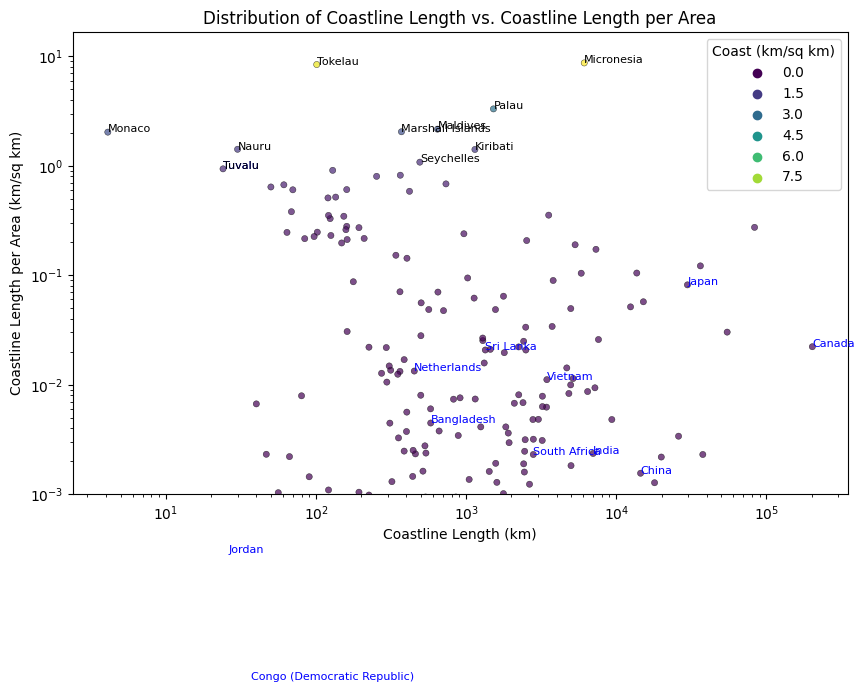

In [6]:
donotplot= [
    "Coral Sea Islands",
    "Spratly Islands",
    "Paracel Islands",
    "Ashmore and Cartier Islands",
    "British Indian Ocean Territory"
]

non_independent_territories = [
    "Greenland",  # Autonomous territory within the Kingdom of Denmark
    "Svalbard",  # Norwegian archipelago
    "Coral Sea Islands",  # External territory of Australia
    "French Southern and Antarctic Lands",  # Overseas territory of France
    "French Polynesia",  # Overseas collectivity of France
    "New Caledonia",  # Special collectivity of France
    #"Taiwan",  # Partially recognized state
    "Northern Mariana Islands",  # Commonwealth of the United States
    "Falkland Islands",  # British Overseas Territory
    "Faroe Islands",  # Autonomous territory within the Kingdom of Denmark
    "Western Sahara",  # Disputed territory
    "Spratly Islands",  # Disputed territory
    "British Indian Ocean Territory",  # British Overseas Territory
    "Paracel Islands",  # Disputed territory
    #"Puerto Rico",  # Commonwealth of the United States
    #"Cape Verde",  # Cape Verde is actually an independent country (Republic of Cabo Verde)
    "Turks and Caicos Islands",  # British Overseas Territory
    "Virgin Islands of the U.S.",  # Territory of the United States
    "Saint Helena, Ascension and Tristan da Cunha",  # British Overseas Territory
    #"Cook Islands",  # Self-governing in free association with New Zealand
    "Saint Pierre and Miquelon",  # Overseas collectivity of France
    "American Samoa",  # Territory of the United States
    "Bermuda",  # British Overseas Territory
    "U.S. Pacific Island Wildlife Refuges",  # Territory managed by the United States
    "British Virgin Islands",  # British Overseas Territory
    "Ashmore and Cartier Islands",  # External territory of Australia
    #"Niue",  # Self-governing state in free association with New Zealand
    "Montserrat",  # British Overseas Territory
    "Saint Martin",  # Overseas collectivity of France
    "Sint Maarten",  # Constituent country of the Kingdom of the Netherlands
    "Wake Island",  # Unorganized territory of the United States
    "Clipperton Island",  # French state private property
    "Navassa Island",  # Unincorporated territory of the United States
    "Bouvet Island", # Dependent territory of Norway,
    'Macau', # Special administrative region of China
    'Pitcairn', # British Overseas Territory, 
    'Gibraltar', # British Overseas Territory,
]
# filter out the countries that are not to be plotted
data = dataorig[~dataorig['Country'].isin(non_independent_territories)]

# filter out the countries that are less than 5 km of coast
#data = data[data['Coast (km)'] > 5]

# Plotting the data
labellist1=['Canada', 'China', 'Congo (Democratic Republic)', 'South Africa', 'United States', 'Netherlands', 'Sri Lanka', 'India', 'Bangladesh',
            'Jordan', 'Vietnam', 'Japan', 'Tuvalu']
# add the 10 countries with largest 'Coast (km/sq km)' to the labellist
labellist2= list(data.nlargest(10, 'Coast (km/sq km)')['Country'])


plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Coast (km)', y='Coast (km/sq km)', hue='Coast (km/sq km)', palette='viridis', s=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Coastline Length vs. Coastline Length per Area')
plt.xlabel('Coastline Length (km)')
plt.ylabel('Coastline Length per Area (km/sq km)')
# log log scale
plt.xscale('log')
plt.yscale('log')
# label the points with the country names only for labellist
for i, row in  data.iterrows():
    if row['Country'] in labellist1:
        # in blue color
        plt.text(row['Coast (km)'], row['Coast (km/sq km)'], row['Country'], color='blue', fontsize=8)
        #print (row['Country'])
    if row['Country'] in labellist2:
        plt.text(row['Coast (km)'], row['Coast (km/sq km)'], row['Country'], color='black', fontsize=8  )
        print (row['Country'], row['Coast (km)'], row['Coast (km/sq km)'], row['Area (sq km)'], row['Area/coast (sq km/km)']     )  
# limit y axis minimum to 1E-3 maximum free
plt.ylim(1E-3, None)
plt.show()

Micronesia 6112.0 8.70655 702.0002182265076 0.11485605664700714
Palau 1519.0 3.30937 458.99974919697706 0.30217231678537004
Kiribati 1143.0 1.40937 811.0006598693033 0.709536885274981
Maldives 644.0 2.16107 298.0005275164618 0.46273373837959897
Seychelles 491.0 1.07912 455.0003706723997 0.9266809993327896
Marshall Islands 370.4 2.04641 180.9998973812677 0.48866063007901644
Tokelau 101.0 8.41667 11.999995247526634 0.11881183413392708
Nauru 30.0 1.41509 21.200065013532708 0.7066688337844236
Tuvalu 24.0 0.9375 25.6 1.0666666666666667
Monaco 4.1 2.0297 2.020002956101887 0.4926836478297285


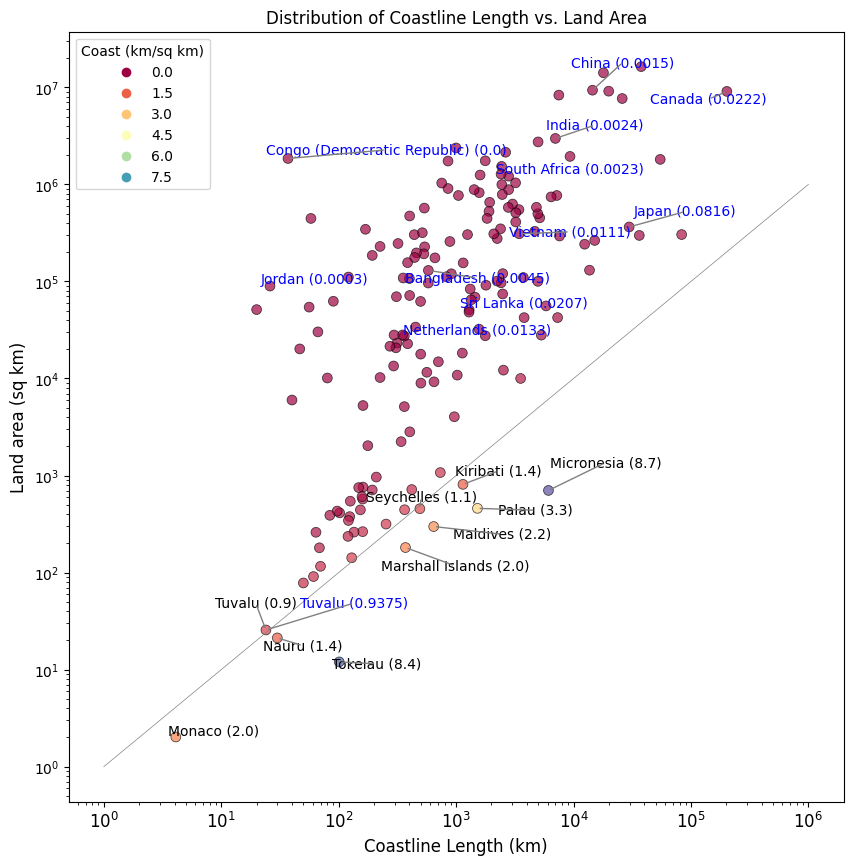

In [20]:
plt.figure(figsize=(10, 10))
x='Coast (km)'
y='Area (sq km)'
sns.scatterplot(data=data, x=x, y=y, hue='Coast (km/sq km)', palette='Spectral', s=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Coastline Length vs. Land Area')
plt.xlabel('Coastline Length (km)', fontsize=12)
plt.ylabel('Land area (sq km)', fontsize=12)
# log log scale
plt.xscale('log')
plt.yscale('log')
# Create a list to store text objects for adjust_text
TEXTS = []
# change font size of axis labels to 12
plt.xticks(fontsize=12)

# Label the points with the country names only for labellist1 and labellist2
for i, row in data.iterrows():
    if row['Country'] in labellist1:
        # Label text as country name with 'Coast (km/sq km)' to 4 decimal places
        txt = row['Country'] + ' (' + str(round(row['Coast (km/sq km)'], 4)) + ')'
        text_obj = plt.text(row[x], row[y], txt, color='blue', fontsize=10)
        TEXTS.append(text_obj)
    
    if row['Country'] in labellist2:
        txt = row['Country'] + ' (' + str(round(row['Coast (km/sq km)'], 1)) + ')'
        text_obj = plt.text(row[x], row[y], txt, color='black', fontsize=10)
        TEXTS.append(text_obj)
        print(row['Country'], row['Coast (km)'], row['Coast (km/sq km)'], row['Area (sq km)'], row['Area/coast (sq km/km)'])

# Adjust the positions of the text labels to prevent overlaps and add arrows
adjust_text(
    TEXTS,
    expand_points=(2, 2),  # Expand text away from points slightly
    force_text=5.0,  # Force labels to move away from each other and from points
    force_points=5.0,  # Force labels to repel from points
    arrowprops=dict(arrowstyle='-', color='gray', lw=1),  # Add arrows to point back to data points
)


plt.plot([1,1e6], [1,1e6], color='gray', linewidth=0.5)
# save svg as figure4.svg
plt.savefig('figure4.svg')
plt.show()

In [8]:
# sort data in descending order of 'Coast (km/sq km)'
ds=data.sort_values('Coast (km)', ascending=True)
# drop Coast (km) zero
ds=ds[ds['Coast (km)'] > 0]
ds

,Country,Coast (km),Coast (km/sq km),Area (sq km),Area/coast (sq km/km)
200,Monaco,4.1,2.02970,2.020003e+00,0.492684
195,Bosnia and Herzegovina,20.0,0.00039,5.128205e+04,2564.102564
194,Tuvalu,24.0,0.93750,2.560000e+01,1.066667
193,Jordan,26.0,0.00029,8.965517e+04,3448.275862
190,Nauru,30.0,1.41509,2.120007e+01,0.706669
...,...,...,...,...,...
5,Philippines,36289.0,0.12171,2.981596e+05,8.216252
4,Russia,37653.0,0.00230,1.637087e+07,434.782609
2,Indonesia,54716.0,0.03020,1.811788e+06,33.112583
1,Norway,83281.0,0.27370,3.042784e+05,3.653635
